# **Task 2 : Prediction using Unsupervised ML**

**Title :** *K-Means Clustering on Iris Dataset to predict the optimum number of clusters and represent it visually*

**Author :** Mushfiqur Rahman 

# **Importing libraries**

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

# **Importing Dataset**

In [2]:
iris = datasets.load_iris() #Load the iris dataset
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() #See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **Analyzing data**

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
target_df = pd.DataFrame(iris.target, columns=['Target'])

In [6]:
target_df.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [7]:
iris_df.shape

(150, 4)

In [8]:
target_df.shape

(150, 1)

In [9]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

# **Finding optimum number of clusters using Elbow Method**

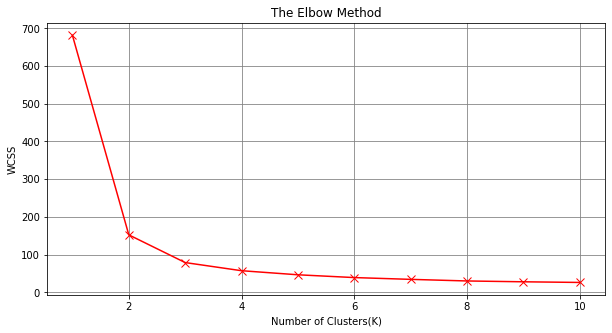

In [12]:
clusters= range(1,11)
wcss = []

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(iris_df)
    prediction=model.predict(iris_df) 
    wcss.append(model.inertia_)

plt.figure(figsize = (10,5))
plt.plot(clusters,wcss,'bx-', c = 'Red', markersize = 8 ) 
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('WCSS')    #Within cluster sum of squares
plt.grid(True, color = 'gray', linestyle = '-')
plt.show()

Using Elbow method we can clearly see that the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration after 3. We consider it as optimum number of clusters.

From this we choose the number of clusters as 3.

# **Building our K-Means Classifier model**

In [13]:
clusterNum = 3 
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(iris_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
#Labelling cluster in dataset
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [15]:
#Centroid Value
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [16]:
iris_df["Clus_km"] = labels   #Adding a new column to preserve labels
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Clus_km
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [17]:
iris_df.groupby('Clus_km').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Clus_km,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


# **Visualising Clusters**

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans  

In [19]:
iris_df = iris_df.values

In [20]:
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


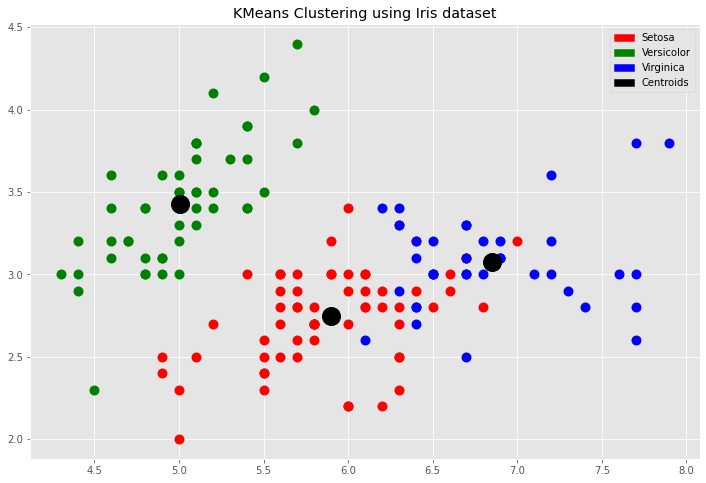

In [21]:
#Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12 , 8))

colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')
black_patch = mpatches.Patch(color='black', label='Centroids')

plt.legend(handles=[red_patch, green_patch, blue_patch, black_patch])


#Create a plot
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    my_members = (labels == k)
    
    #Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    #Plots the datapoints with color col.
    ax.plot(iris_df[my_members, 0], iris_df[my_members, 1], 'None', markerfacecolor=col, marker='.', markeredgecolor='None', markersize= 20)
    
    #Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor='black',  markeredgecolor='black', markersize= 18)

#Title of the plot
ax.set_title('KMeans Clustering using Iris dataset')

#Show the plot
plt.show()


From above, we can see our data are divided into 3 distinct clusters and each of them has their own centroid. That is how we can classify our data using K-Means clustering. 